In [7]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [8]:
#Get Ticker For Largest Company
nyse= pd.read_excel('listings.xlsx',sheet_name= 'nyse', na_values= 'n/a')
nyse= nyse.sort_values('Market Capitalization', ascending= False)
nyse[['Stock Symbol','Company Name']].head(3)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name
1586,JNJ,Johnson & Johnson
1125,XOM,Exxon Mobil Corporation
1548,JPM,J P Morgan Chase & Co


In [9]:
largest_by_market_cap= nyse.iloc[0]
largest_by_market_cap['Stock Symbol']

'JNJ'

In [10]:
#2nd approace

nyse =nyse.set_index('Stock Symbol') #stock ticker as index
nyse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, JNJ to EAE
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           3147 non-null   object 
 1   Last Sale              3079 non-null   float64
 2   Market Capitalization  3147 non-null   float64
 3   IPO Year               1361 non-null   float64
 4   Sector                 2177 non-null   object 
 5   Industry               2177 non-null   object 
dtypes: float64(3), object(3)
memory usage: 172.1+ KB


In [11]:
nyse['Market Capitalization'].idxmax() #index of Max value

'JNJ'

In [12]:
#get ticker for largest tech company
nyse['Sector'].unique() #unique values as numpy array
tech = nyse.loc[nyse.Sector== 'Technology']
tech['Company Name'].head(2)

Stock Symbol
ORCL                                 Oracle Corporation
TSM     Taiwan Semiconductor Manufacturing Company Ltd.
Name: Company Name, dtype: object

In [13]:
nyse.loc[nyse.Sector =='Technology', 'Market Capitalization'].idxmax()

'ORCL'

#Get Data for Largest tech company with 2017 IPO

In [ ]:
pip install yfinance

In [15]:
import yfinance as yf
yf.pdr_override()

In [25]:
ticker = nyse.loc[(nyse.Sector=='Technology') & (nyse['IPO Year']== 2017),'Market Capitalization'].idxmax()
data= wb.DataReader(ticker,start='2017-1-1')
data= data.loc[:, ['Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [26]:
data.head()

,Close,Volume
Date,,
2017-03-02,24.480000,217048900
2017-03-03,27.090000,148166400
2017-03-06,23.770000,72903000
2017-03-07,21.440001,71857800
2017-03-08,22.809999,49819100


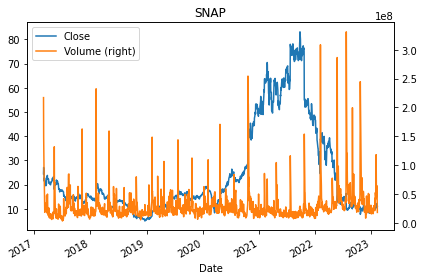

In [27]:
#Visualize Price and Volume on two axes
data.plot(title=ticker,secondary_y= 'Volume')
plt.tight_layout();
plt.show()